## Problem Statement :- 
The Titanic dataset includes information on passengers who were aboard the Titanic when it sank. The goal is to predict whether a passenger survived or not based on features like age, gender, class, and fare.


In [1]:
# Import libraries
import numpy as np    # For numerical operations
import pandas as pd   # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns            # For more advanced plotting and styling
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

In [2]:
train_data = pd.read_csv("train (1).csv")
test_data = pd.read_csv("test (1).csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1) PassengerId: Unique identifier for each passenger (drop for modeling).
2) Survived: Target variable indicating survival status (0 = No, 1 = Yes).
3) Pclass: Passenger's travel class (1st, 2nd, 3rd), an ordinal feature.
4) Name: Passenger's name, potentially useful for extracting titles.
5) Sex: Gender of the passenger.
6) Age: Age of the passenger, with some missing values.
7) SibSp: Number of siblings/spouses aboard.
8) Parch: Number of parents/children aboard.
9) Ticket: Ticket number.
10) Fare: Fare paid for the ticket, a numerical feature.
11) Cabin: Cabin number, mostly missing values (consider dropping or creating a new feature).
12) Embarked: Port of embarkation.

Column Types
1) Numerical :- PassengerId, Parch, Fare.
2) Categorical :- Sex, Embarked, Survived(because they only 2 values 0 & 1), Pclass, SibSp
3) Mixed :- Name, Ticket, Cabin

In [6]:
train_data.drop(columns=['PassengerId'],inplace=True)

In [7]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Univariate Analysis.

#### 1) Age

<Axes: ylabel='Frequency'>

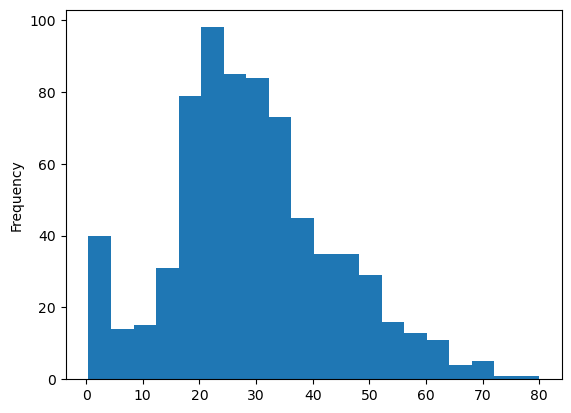

In [8]:
# Univariate Analysis on Age column.
train_data['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

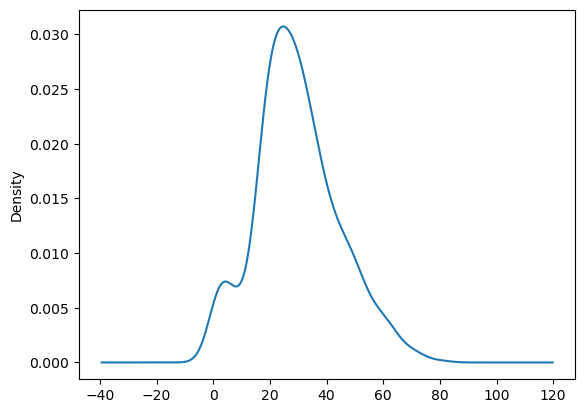

In [9]:
# Distribution of Age data(Density Plot).
train_data['Age'].plot(kind='kde')

In [10]:
# Check Skewness of Age data.
train_data['Age'].skew()

0.38910778230082704

<Axes: >

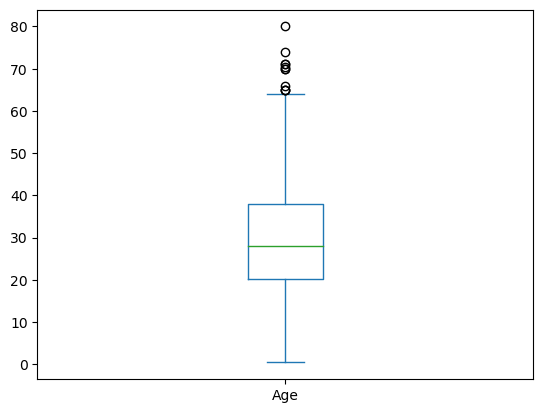

In [11]:
train_data['Age'].plot(kind='box')

In [12]:
train_data[train_data.Age>65]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [13]:
# Check Missing Values
train_data.Age.isnull().sum()/len(train_data.Age)

0.19865319865319866

### Conclusion :-

1) Age is almost normally distributed.
2) 20% of the values are missing.
3) There are some outliers.

#### 2) Fare 

<Axes: ylabel='Frequency'>

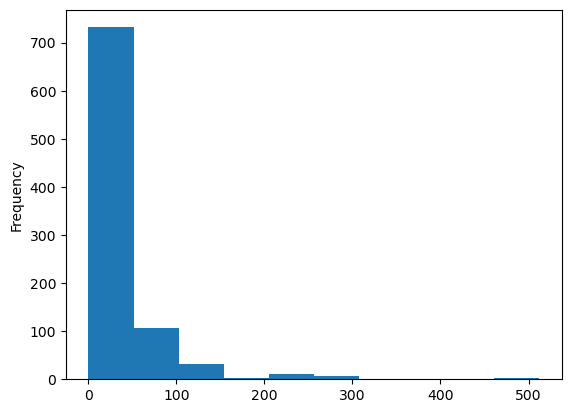

In [14]:
# Fare Columns 
train_data.Fare.plot(kind='hist')

<Axes: ylabel='Density'>

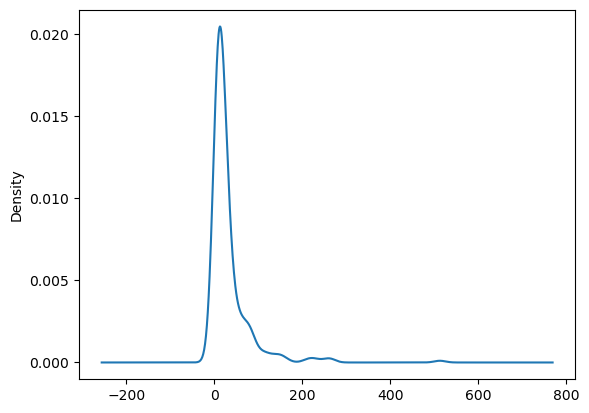

In [15]:
train_data.Fare.plot(kind='kde')

In [16]:
train_data.Fare.skew()

4.787316519674893

<Axes: >

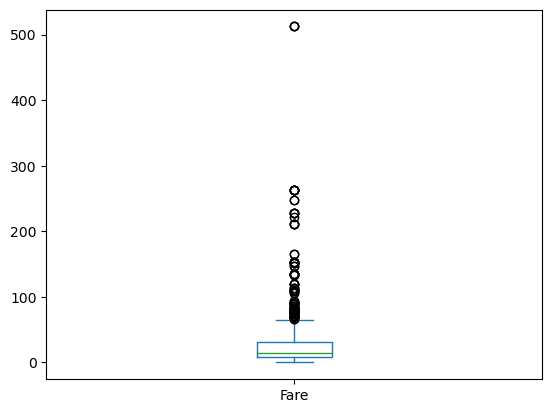

In [17]:
train_data.Fare.plot(kind='box')

In [18]:
train_data[train_data.Fare>250]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [19]:
train_data.Fare.isnull().sum()

0

### Conclusion :-

1) The data is highly(positively) skewed.
2) Fare col actually contains the group fare & not the individual fare (This is might be an issue)
3) We need to create a new col is called individual fare.

### Univariate Analysis on Categorical col.

#### 3) Survived

In [20]:
train_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

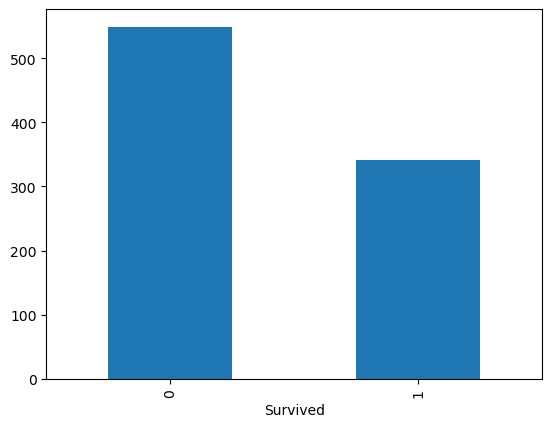

In [21]:
# Visualization throught bar plot.
train_data.Survived.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

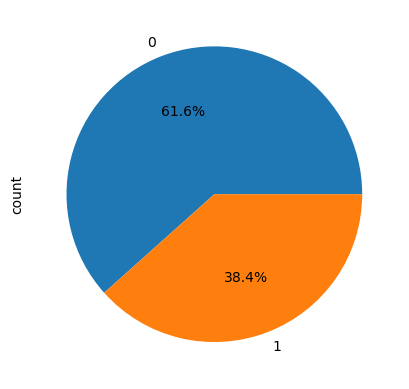

In [22]:
# how many percent peoples could not survived.
train_data.Survived.value_counts().plot(kind='pie',autopct='%0.1f%%')

In [23]:
train_data.Survived.isnull().sum()

0

### Conclusion :-

 More than 61% people could not survived.

#### 4) Pclass

In [24]:
train_data.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

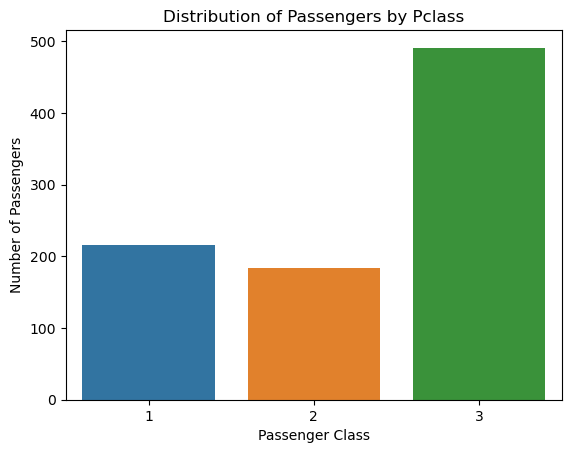

In [25]:
# Bar plot for Pclass distribution
sns.countplot(x='Pclass', data=train_data)
plt.title('Distribution of Passengers by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

<Axes: ylabel='count'>

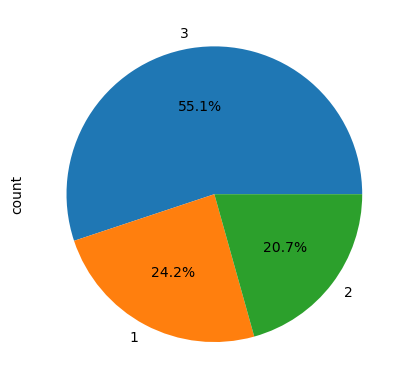

In [26]:
train_data.Pclass.value_counts().plot(kind='pie',autopct='%0.1f%%')

In [27]:
train_data.Pclass.isnull().sum()

0

### Conclusion :- 

The majority of passengers were in 3rd class, followed by 1st and 2nd classes.

####  5) Sex

In [28]:
train_data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

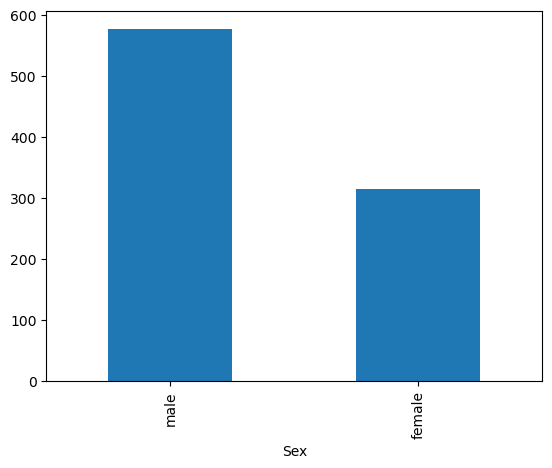

In [29]:
train_data.Sex.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

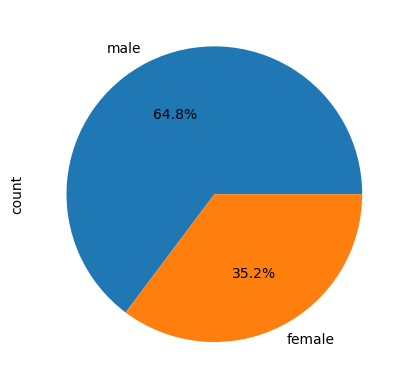

In [30]:
train_data.Sex.value_counts().plot(kind='pie',autopct='%0.1f%%')

In [31]:
train_data.Sex.isnull().sum()

0

### Conclusion :- 

 61.8% of the passengers were male, and 38.2% were female.

#### 6) SibSp

In [32]:
train_data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

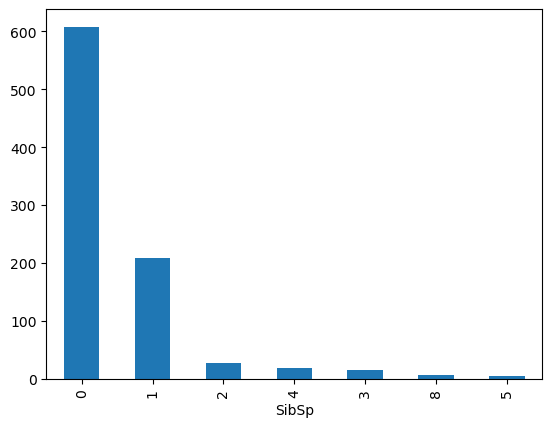

In [33]:
train_data.SibSp.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

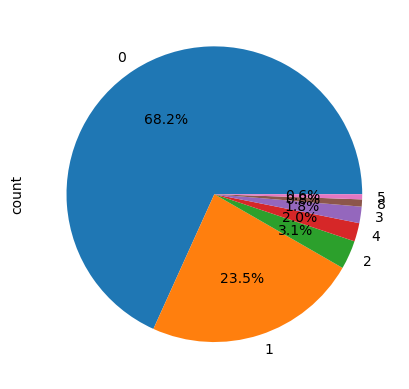

In [34]:
train_data.SibSp.value_counts().plot(kind='pie',autopct='%0.1f%%')

### Conclusion:-

Most passengers on the Titanic traveled without any siblings or spouses, with a smaller number traveling with one or more. 

#### 7) Parch

In [35]:
train_data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

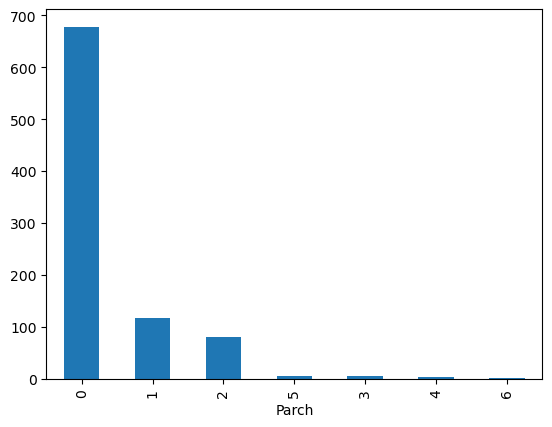

In [36]:
train_data.Parch.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

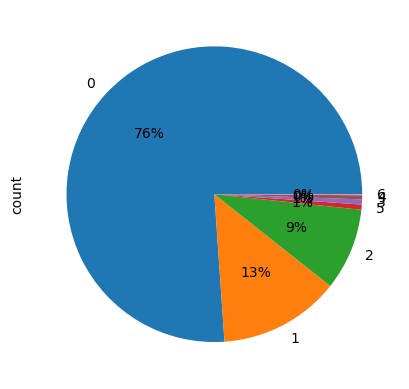

In [37]:
train_data.Parch.value_counts().plot(kind='pie',autopct='%1.0f%%')

### Conclusion :- 

most passengers on the Titanic traveled without any parents or children, with a smaller number traveling with one or more.
from conclusion Parch & SibSp column give same information.
1) Parch & SibSp col can be merged to from a new col call family_size
2) Also create a new col called is_alone

#### 8) Embarked

In [38]:
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

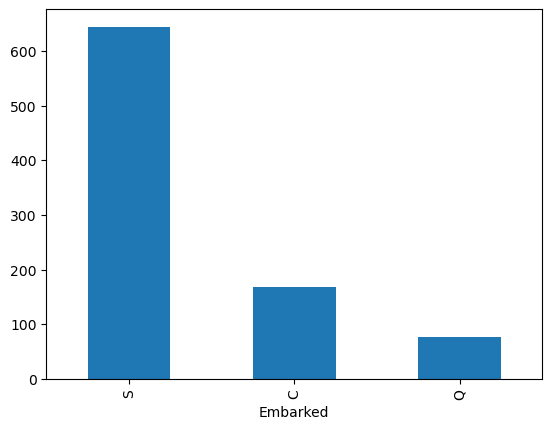

In [39]:
train_data.Embarked.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

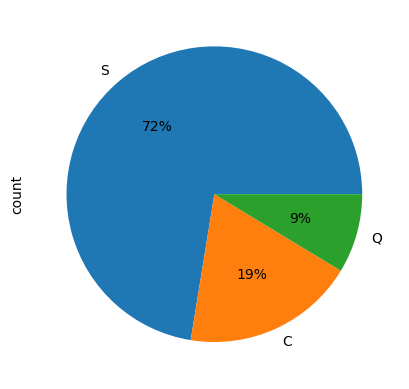

In [40]:
train_data.Embarked.value_counts().plot(kind='pie',autopct='%1.0f%%')

### Conclusion:-

Most passengers boarded the Titanic at Southampton, followed by Cherbourg and Queenstown. 

## Bivariate Analysis.

#### Pclass

In [41]:
pd.crosstab(train_data['Survived'],train_data['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [42]:
# In percentage 
pd.crosstab(train_data['Survived'],train_data['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


### Conclusion:-

Higher-class passengers had a significantly better chance of survival, while lower-class passengers, particularly those in 3rd class, faced the greatest risks

#### Sex

In [43]:
pd.crosstab(train_data['Survived'],train_data['Sex'],normalize = 'columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


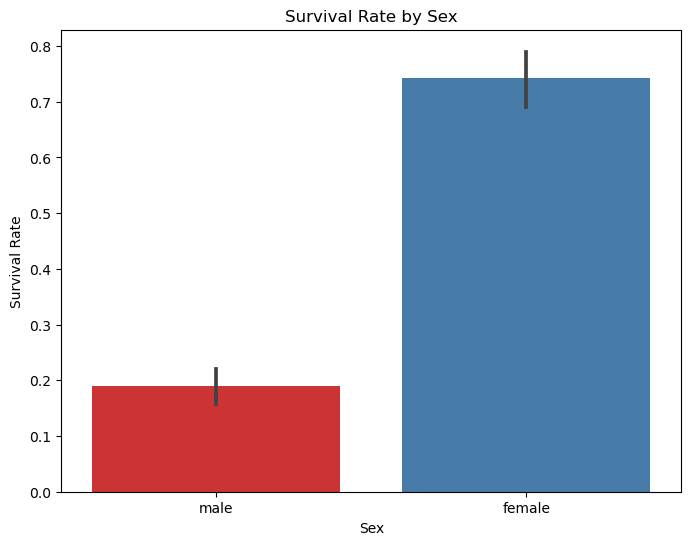

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data, palette='Set1')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

### Conclusion:-

Female passengers had a significantly higher survival rate compared to males.

#### Age

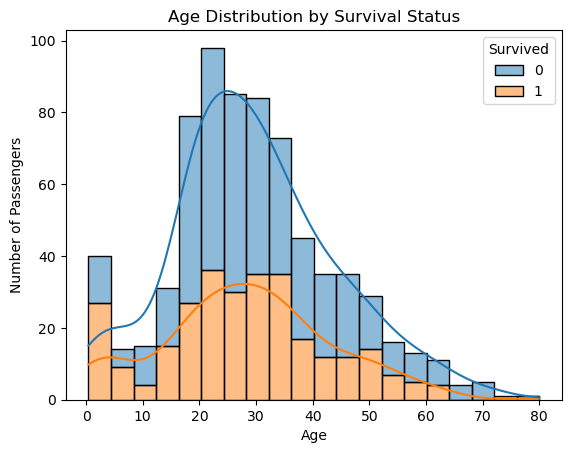

In [45]:
sns.histplot(train_data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

### Conclusion :-

with younger passengers, especially children(under 10) , having a better chance of survival. The survival rate decreases with age, particularly for those above 50 years.

#### Embarked

In [46]:
pd.crosstab(train_data['Survived'],train_data['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


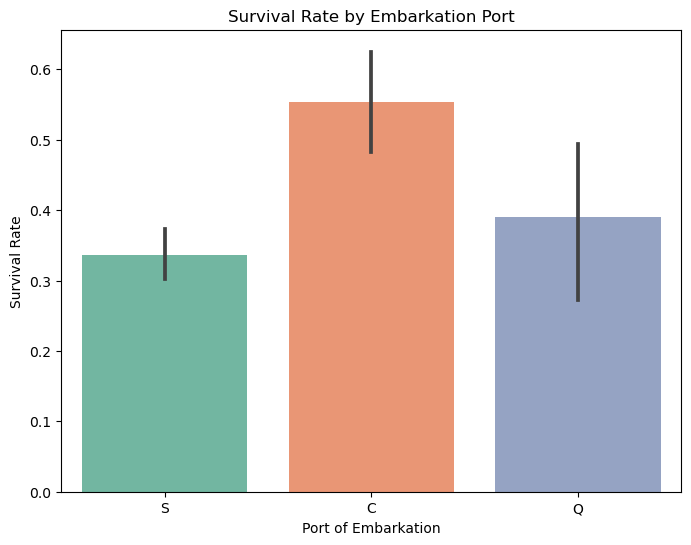

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=train_data, palette='Set2')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

In [48]:
pd.crosstab(train_data['Sex'],train_data['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [49]:
pd.crosstab(train_data['Pclass'],train_data['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


### Conclusion:- 

with passengers boarding at Cherbourg having the best chances of survival, followed by Queenstown and then Southampton. due to the fact that half of them were 1st class. 

### Feature Engineering 

In [50]:
df = pd.concat([train_data, test_data])

In [51]:
train_data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [52]:
train_data[train_data.SibSp==8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [53]:
df[df['Ticket']=='CA. 2343']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId
159,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
180,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
201,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
324,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
792,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
846,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
863,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
188,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,1080.0
342,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,1234.0
360,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,1252.0


In [54]:
df['individual_Fare']= df['Fare']/(df['SibSp']+df['Parch']+1)

In [55]:
df['individual_Fare']

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: individual_Fare, Length: 1309, dtype: float64

In [56]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,individual_Fare
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,3.625000
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,35.641650
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,7.925000
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,26.550000
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1305.0,8.050000
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1306.0,108.900000
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1307.0,7.250000
416,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1308.0,8.050000


In [57]:
df['Family_size']=df['SibSp']+df['Parch']+1

In [58]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,individual_Fare,Family_size
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,3.625000,2
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,35.641650,2
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,7.925000,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,26.550000,2
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1305.0,8.050000,1
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1306.0,108.900000,1
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1307.0,7.250000,1
416,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1308.0,8.050000,1


In [59]:
# Family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transfrom_family_size(num):
    
    if num==1:
        return 'alone'
    elif num>1 and num<5:
        return 'small'
    else:
        return 'large'

In [60]:
df['Family_type'] = df['Family_size'].apply(transfrom_family_size)

In [61]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,individual_Fare,Family_size,Family_type
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,3.625000,2,small
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,35.641650,2,small
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,7.925000,1,alone
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,26.550000,2,small
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1305.0,8.050000,1,alone
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1306.0,108.900000,1,alone
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1307.0,7.250000,1,alone
416,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1308.0,8.050000,1,alone


In [62]:
pd.crosstab(df['Survived'],df['Family_type'],normalize='columns')*100

Family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


### Conclusion:-

1) Passengers in large families had the lowest survival rate.
2) Passengers traveling in small families had a better chance of survival.
3) Traveling alone also had a lower chance of survival but fared better than those in large families.

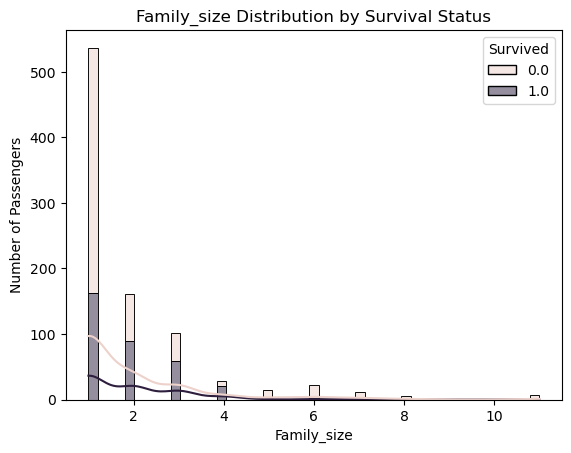

In [63]:
sns.histplot(df, x='Family_size', hue='Survived', multiple='stack', kde=True)
plt.title('Family_size Distribution by Survival Status')
plt.xlabel('Family_size')
plt.ylabel('Number of Passengers')
plt.show()

In [64]:
df['Surname']=df['Name'].str.split(',').str.get(0)

In [65]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,individual_Fare,Family_size,Family_type,Surname
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,3.625000,2,small,Braund
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,35.641650,2,small,Cumings
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,7.925000,1,alone,Heikkinen
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,26.550000,2,small,Futrelle
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,8.050000,1,alone,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1305.0,8.050000,1,alone,Spector
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1306.0,108.900000,1,alone,Oliva y Ocana
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1307.0,7.250000,1,alone,Saether
416,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1308.0,8.050000,1,alone,Ware


In [66]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [67]:
df['title'].value_counts()

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [68]:
# Titles to combine into 'Others'
titles_to_combine = ['Dr.', 'Col.', 'Capt.', 'the','Rev.','Major.','Don.','Jonkheer.']
df['title'] = df['title'].replace(titles_to_combine, 'Others')

In [69]:
miss_combine = ['Ms.','Mlle.']
df['title']=df['title'].replace(miss_combine,'Miss.')

In [70]:
mrs_combine =['Mme.','Lady.','Dona.']
df['title']=df['title'].replace(mrs_combine, 'Mrs.')

In [71]:
df['title'] = df['title'].replace({'Sir.':'Mr.'})

In [72]:
df['title'].value_counts()

title
Mr.        758
Miss.      264
Mrs.       200
Master.     61
Others      26
Name: count, dtype: int64

In [73]:
temp_df=[df['title'].isin(['Mr.','Miss.','Mrs.','Master.','Others '])]

In [74]:
pd.crosstab(df['Survived'],df['title'],normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.,Others
Survived,,,,,
0.0,42.5,29.72973,84.169884,20.472441,71.428571
1.0,57.5,70.27027,15.830116,79.527559,28.571429


### Conclusion:- 

1) Higher Survival Rates: Generally associated with Miss & Mrs.
2) Lower Survival Rates: Predominantly observed Mr title passengers.

In [75]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

0.774637127578304

In [76]:
df.Cabin.value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [77]:
df['Cabin'].fillna('M',inplace=True)

In [78]:
df['deck']= df['Cabin'].str[0]

In [79]:
df['deck'].value_counts()

deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [80]:
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


In [81]:
pd.crosstab(df['Survived'],df['deck'],normalize='columns')*100

deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1.0,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0


<Axes: xlabel='deck'>

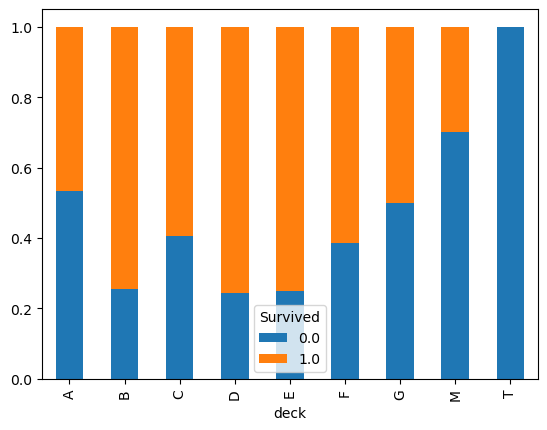

In [82]:
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

### Conclusion:-

Probability of Surviving vary from deck to deck.

### Multivariate Analysis 

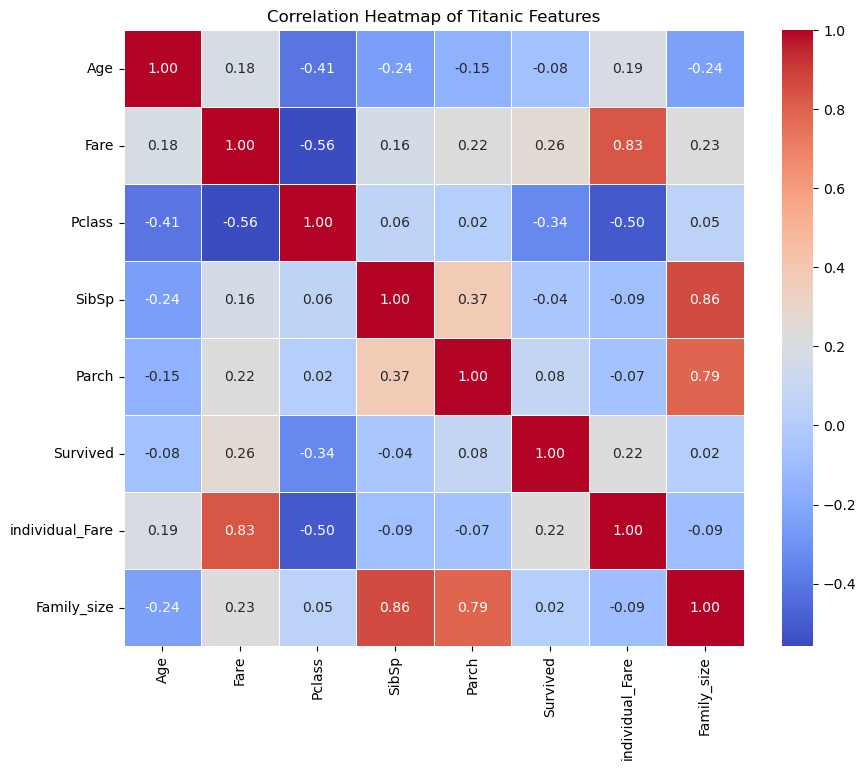

In [83]:
# Compute the correlation matrix
corr_matrix = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived','individual_Fare','Family_size']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Features')
plt.show()


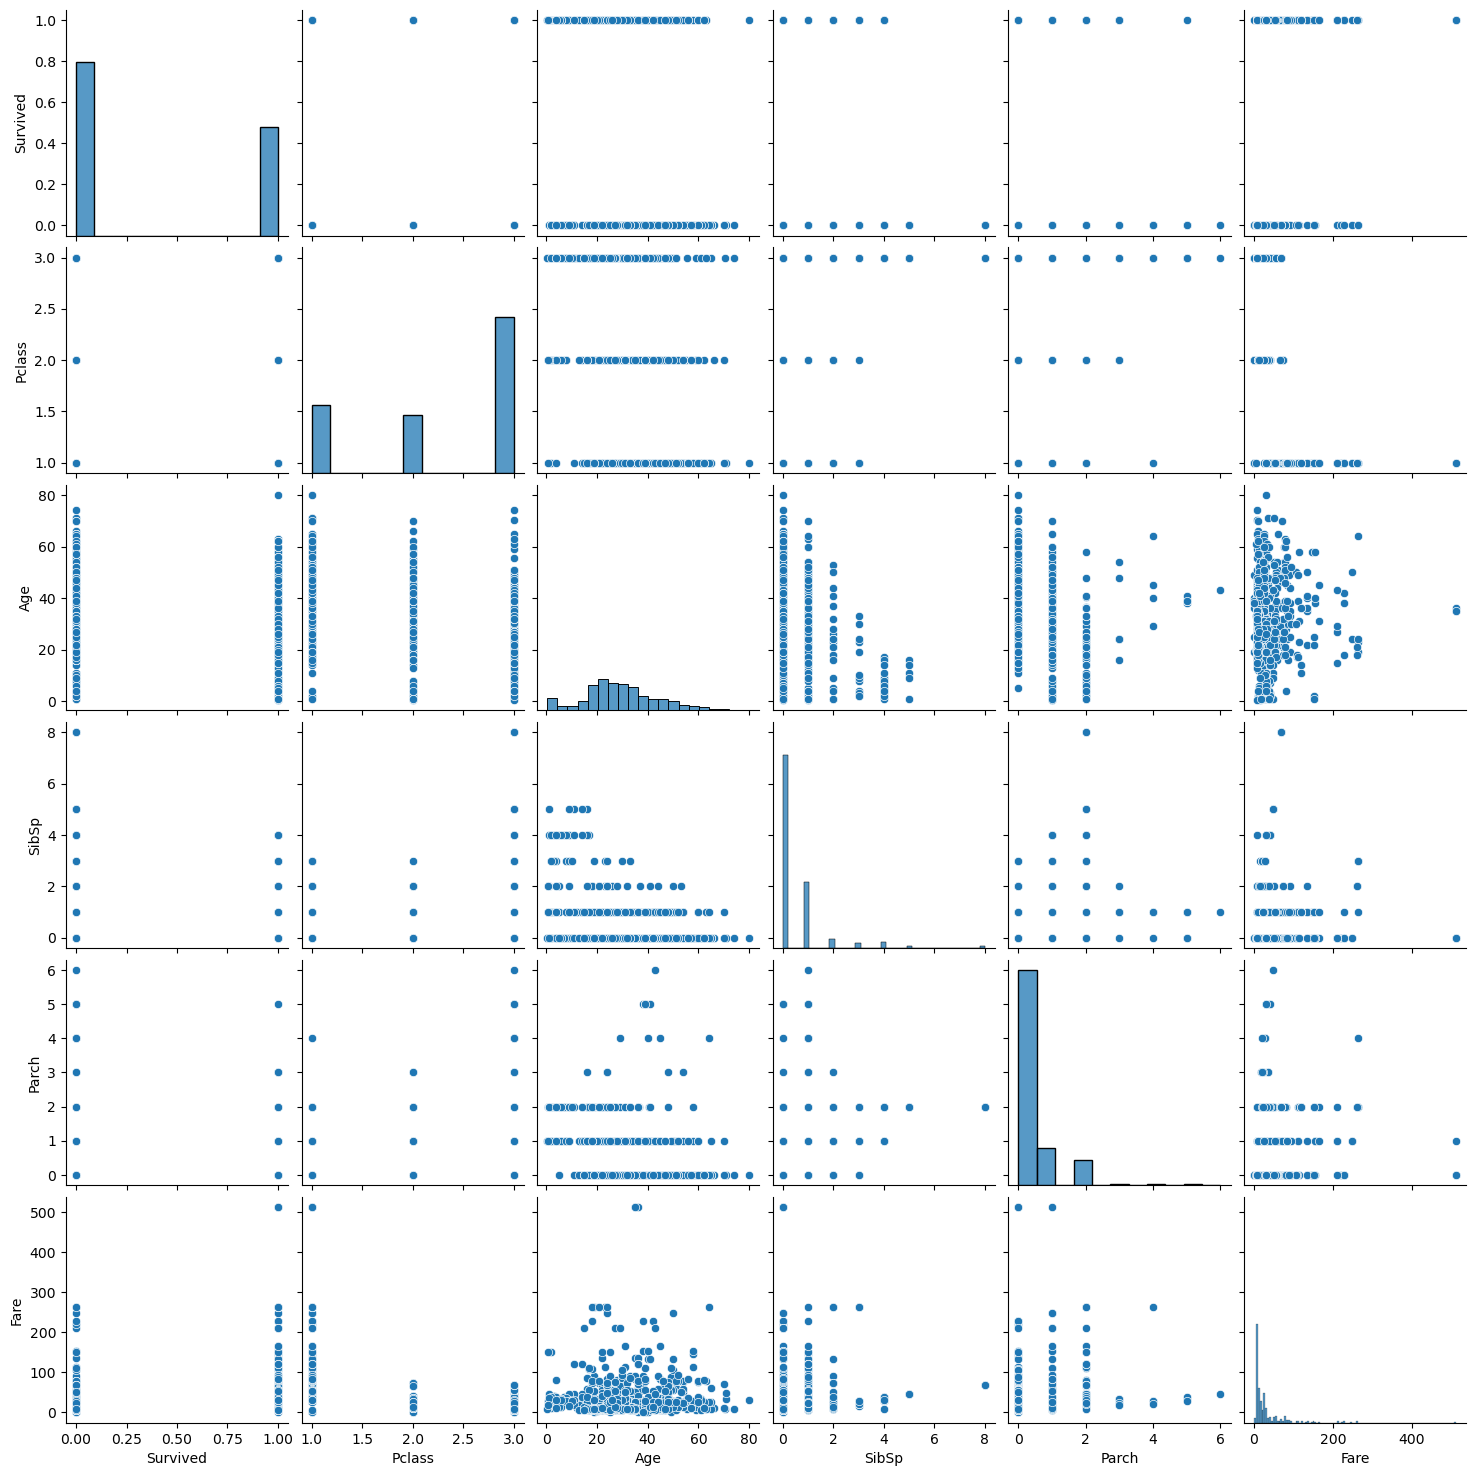

In [84]:
sns.pairplot(train_data)

## Final Conclusion:-

The analysis of the Titanic dataset reveals several key insights:

1) Survival Rate: Around 38% of passengers survived the Titanic disaster.
2) Passenger Class: Passengers in higher classes (1st and 2nd) had better chances of survival, while those in 3rd class faced the highest risk.
3) Gender: Women had a much higher survival rate compared to men.
4) Age: Younger passengers, especially children under 10, were more likely to survive. The survival rate decreased significantly for passengers over 50.
5) Embarkation Port: Passengers who boarded at Cherbourg had the best chances of survival, followed by those from Queenstown, and then Southampton.
These findings suggest that social and economic factors, along with physical characteristics, played significant roles in determining survival during the Titanic disaster.